### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

# Machine Learning Steps:
        1.Define required libraries with which the model will optmised.
        2.Data Cleansing and Wrangling.
        3.Feature Engineering
        4.Data pre-processing
        5.Feature selection
        6.Split the data into training and testing
        7.Model selection
        8.Model validation
        9.Interpret the results

### Define the required libraries

In [14]:
#as of now we will import pandas library and the remainig will be downloaded at the time of theie requirement
import pandas as pd

### loading the data set

In [15]:
data=pd.read_csv('avocado.csv', parse_dates=True)

In [16]:
data.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


In [17]:
#we are going to drop the Unnamed: 0 column as it was no use for us in the data analysis
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [18]:
# let see the data types and count of each columns in the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


#### Observations:
    1.there are 18249 maximum enrties in each field
    2.no nan values are present in the data
    3.total 13 fields are present in the data in which 9 are float data type,1 int data type and 3 string data types.

#### framing the data set into 2d frame of pandas library called DataFrame

In [19]:
#lets assign the data to a variable called av
av=pd.DataFrame(data)

In [20]:
av.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


### EDA(Exploatory Data Analysis):
    1.Statistical analysis
    2.Graphical/visual insights analysis

#### 1.Statistical Analysis

In [21]:
av.describe(include='all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2017-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Philadelphia
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


#### Observations:
    1.2017-05-14 is the data with high number of 108 times
    2.AveragePrice column has high std and percentiles are not uniform, large difference between max and 75th percentile
    3.Total Volume column is having a very high std,large differences are observed between the percentiles
    4.PLU's 4046,4225,4770 is also having a high std, large differences are observed in min, percentiles and max values
    5.Total Bags, Small Bags, Large Bags columns are also having high std, high differences between the min, percentiles,max values.
    6.Convenional type records highest day sales than organic with 9126 which is not a big difference comapred to 9123 organic but both types are avocados are farming equally
    7.of all the regions Louisville recorded high with 338 times

In [22]:
av.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


In [23]:
av['Date'].nunique(),av['year'].nunique()

(169, 4)

the data is for 4 years with 169 days in all the years

In [24]:
av['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

### Viusal Analysis of the data

AxesSubplot(0.125,0.125;0.775x0.755) 
 Date              52
AveragePrice     203
Total Volume    5615
4046            5526
4225            5575
4770            3789
Total Bags      5524
Small Bags      5112
Large Bags      4196
XLarge Bags     1310
type               2
year               1
region            54
dtype: int64


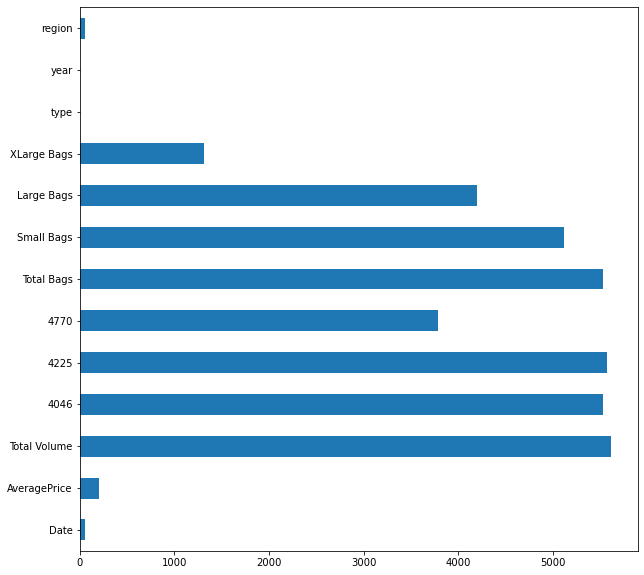

In [29]:
plt.figure(figsize=(10,10))
print(av[av['year']==2015].nunique().plot.barh(),'\n',av[av['year']==2015].nunique())

<AxesSubplot:>

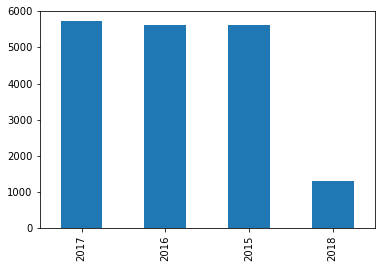

In [30]:
av['year'].value_counts().plot.bar()

<AxesSubplot:>

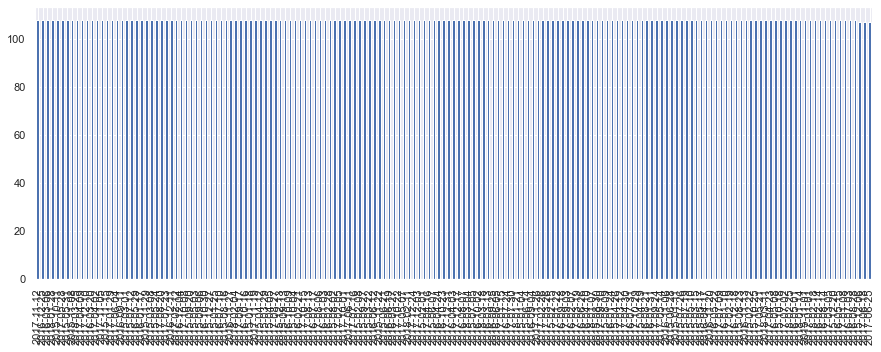

In [31]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1)
av['Date'].value_counts().plot.bar()

### Univarient analysis

In [32]:
#importing the required visual libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
sns.set_theme(color_codes='g', context='notebook', style='darkgrid')

<AxesSubplot:>

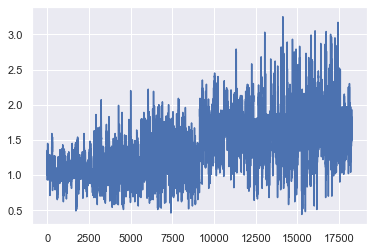

In [34]:
av['AveragePrice'].plot.line()

The average price is lies in between 0.75 to 2

In [35]:
av.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


<AxesSubplot:>

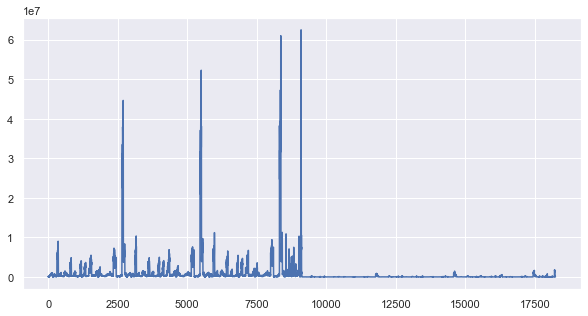

In [36]:
plt.figure(figsize=(10,5))
av['Total Volume'].plot.line()

total volume sold are in range of 0 to 17500 but highest are lie in between 2500 to 9000

<AxesSubplot:>

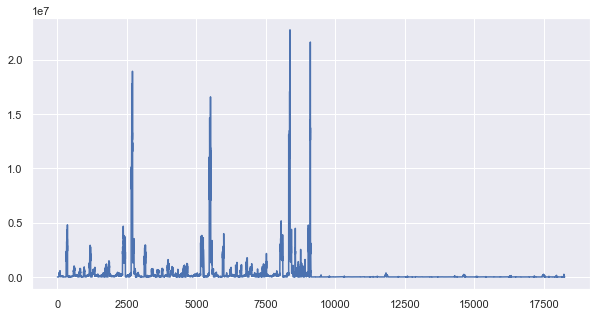

In [37]:
plt.figure(figsize=(10,5))
av['4046'].plot.line()

4046 is having the highest sale in between the index of 0 to 9000

<AxesSubplot:>

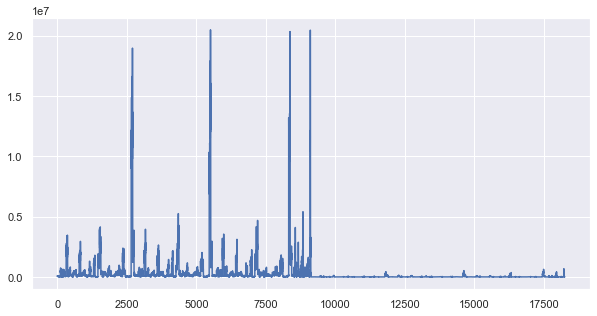

In [38]:
plt.figure(figsize=(10,5))
av['4225'].plot.line()

highest sales are in between 0 to 9000 index

<AxesSubplot:>

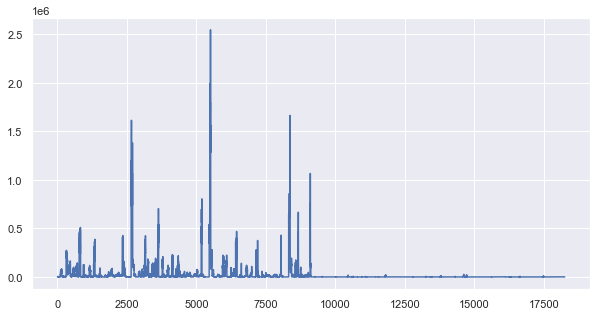

In [39]:
plt.figure(figsize=(10,5))
av['4770'].plot.line()

this is also highest sales in between 0 to 9000

<AxesSubplot:>

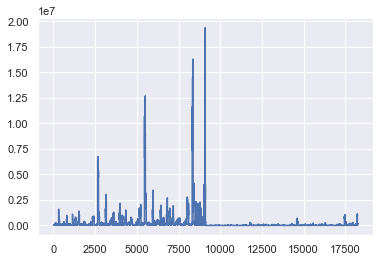

In [40]:
av['Total Bags'].plot.line()

total bags sold are also in between 0 to 9000 index points

<AxesSubplot:>

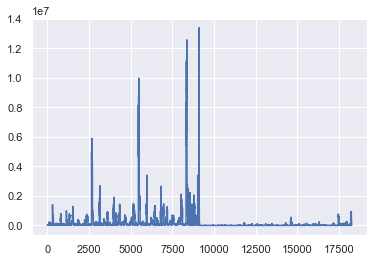

In [41]:
av['Small Bags'].plot.line()

highest sales of small bags are in between 0 to 9000 only

<AxesSubplot:>

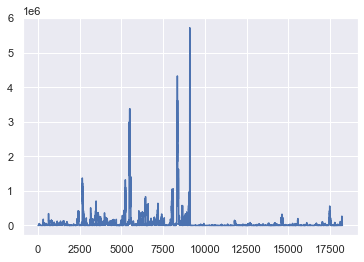

In [42]:
av['Large Bags'].plot.line()

large bags sold are also in between the 0 to 9000

<AxesSubplot:>

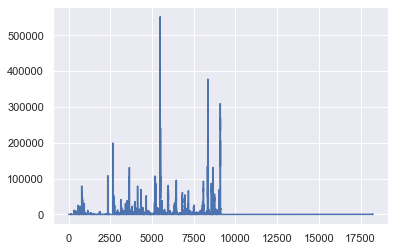

In [43]:
av['XLarge Bags'].plot.line()

this is also same

<AxesSubplot:>

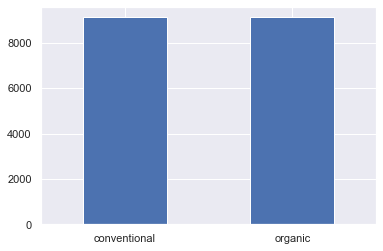

In [44]:
av['type'].value_counts().plot.bar(rot=0)

the consumption of both type avocade are almost same

<AxesSubplot:>

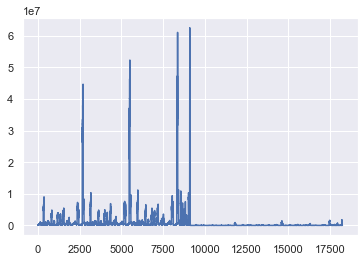

In [45]:
av['Total Volume'].plot.line()

total volums of sale lie in between the 0 to 9000 index

<AxesSubplot:>

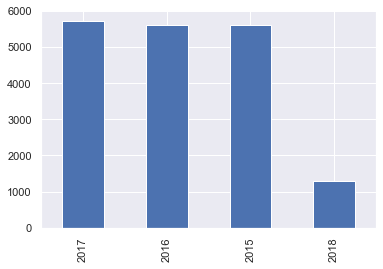

In [46]:
av['year'].value_counts().plot.bar()

the data collected from the year 2018 is less

<AxesSubplot:>

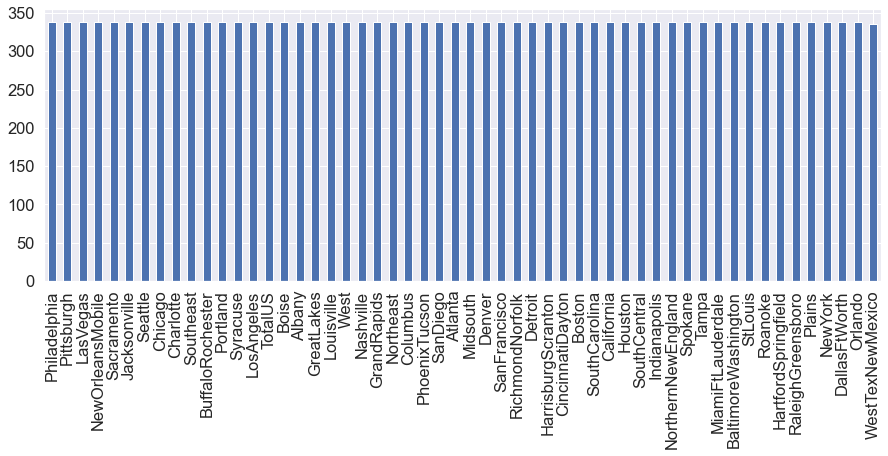

In [47]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
av['region'].value_counts().plot.bar()

the no of data samples collected from each area is almost same

### Bivarient analysis

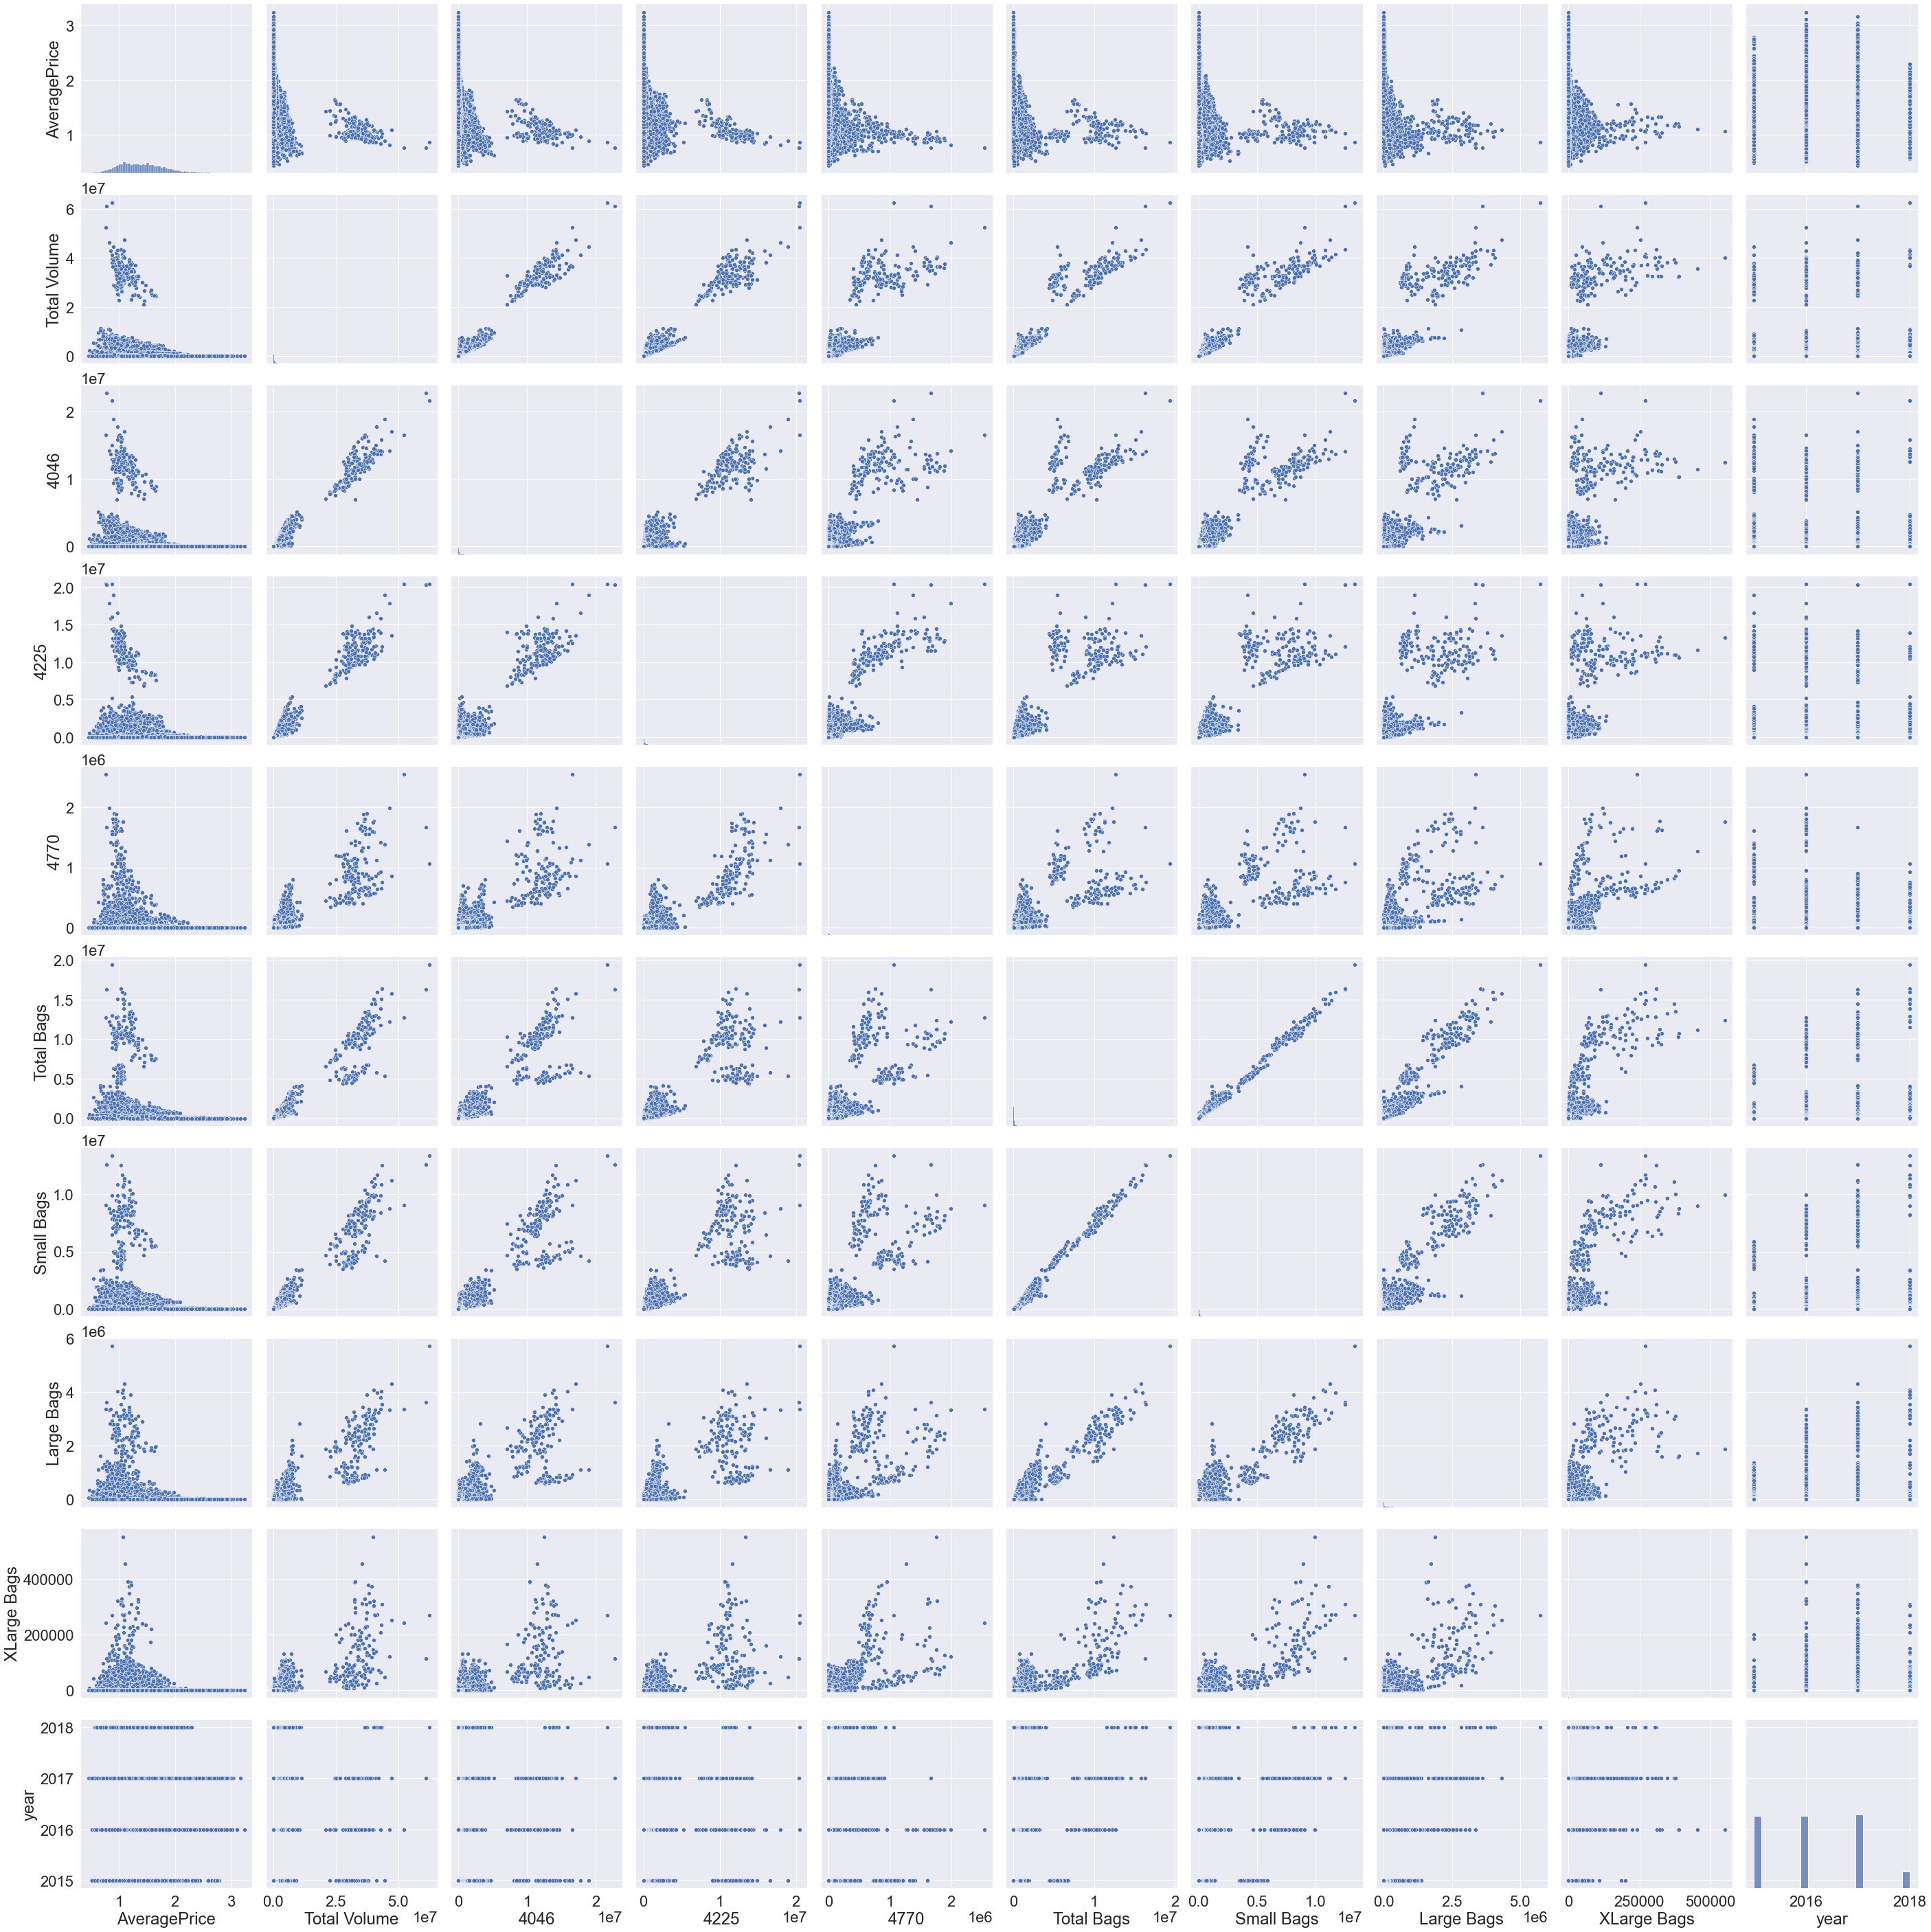

In [48]:

sns.set(font_scale=2)
sns.pairplot(av, height=4, aspect=1)

### Observations:
    1. most of the sales of avocado was in the avg price of .75 to 2.5 for large bags, xlarge bags, small bags and for total volums
    2. PLU grade sales are also high in the avg price of 0.75 to 2.5
    3. types of bags and type of grade are highly sold in range of 25000000 to 5000000 compared to total volumes
    4. the average price is less in 2018 as the data was less collected and the average price is same in all the ramaining 3 years
    

### Checking for the outliers

AveragePrice       AxesSubplot(0.125,0.657941;0.133621x0.222059)
Total Volume    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
4046             AxesSubplot(0.44569,0.657941;0.133621x0.222059)
4225            AxesSubplot(0.606034,0.657941;0.133621x0.222059)
4770            AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Total Bags         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Small Bags      AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Large Bags       AxesSubplot(0.44569,0.391471;0.133621x0.222059)
XLarge Bags     AxesSubplot(0.606034,0.391471;0.133621x0.222059)
year            AxesSubplot(0.766379,0.391471;0.133621x0.222059)
dtype: object

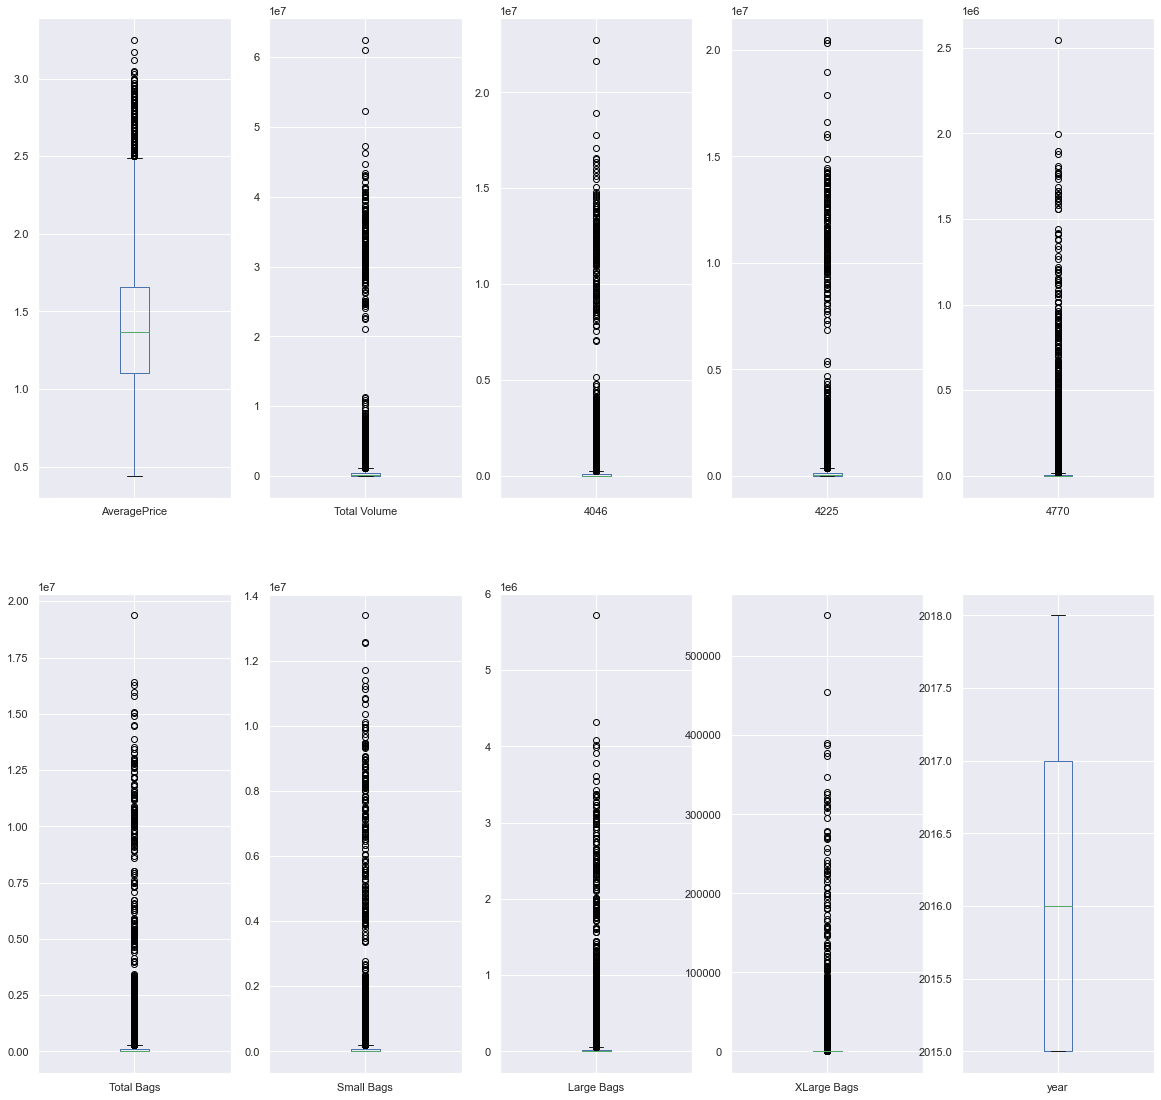

In [49]:
sns.set(font_scale=1)
av.plot(kind='box',subplots=True, layout=(3,5), figsize=(20,30))

Outliers are present in all the fields

### Removing the outliers

by calculating the Z score we can remove the outliers with zscore value of greater than 3

In [50]:
# importing the numpy library and stats library
# we have to convert the string data to numeric data
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [51]:
#for calsification type more than 2 we use labelencoder, if the class are 2 then we use one hot encoder
lb=LabelEncoder()
oh=OneHotEncoder()

In [52]:
av['Date']=lb.fit_transform(av['Date'])

In [53]:
av['Date']

0         51
1         50
2         49
3         48
4         47
        ... 
18244    161
18245    160
18246    159
18247    158
18248    157
Name: Date, Length: 18249, dtype: int32

In [54]:
av['region']=lb.fit_transform(av['region'])
av['type']=lb.fit_transform(av['type'])
av['year']=lb.fit_transform(av['year'])

In [55]:
av['year']

0        0
1        0
2        0
3        0
4        0
        ..
18244    3
18245    3
18246    3
18247    3
18248    3
Name: year, Length: 18249, dtype: int64

In [56]:
av.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0


In [57]:
z=np.abs(zscore(av))

In [58]:
z

array([[0.67635986, 0.18868864, 0.22771641, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.69685742, 0.13901962, 0.23042664, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       [0.71735497, 1.18206895, 0.21208462, ..., 0.99983562, 1.22128204,
        1.7002522 ],
       ...,
       [1.53737632, 1.15237477, 0.24233073, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.51687877, 1.30138182, 0.24162464, ..., 1.00016441, 1.97050371,
        1.70081131],
       [1.49638121, 0.53151208, 0.24125273, ..., 1.00016441, 1.97050371,
        1.70081131]])

In [59]:
threshold=3
np.where(z<3)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64),
 array([ 0,  1,  2, ..., 10, 11, 12], dtype=int64))

In [60]:
a1=av[(z<=3).all(axis=1)]

In [61]:
a1.size, av.size

(229463, 237237)

In [62]:
(av.size-a1.size)*100/av.size

3.276891884486821

only 3.3% data we are losing after droping the rows with z score > 3

### Checking the skewness and reducing it

In [63]:
from scipy.stats import boxcox 
from sklearn.preprocessing import power_transform
a1.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,50,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

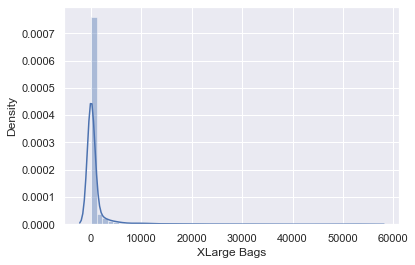

In [64]:
sns.distplot(a1['XLarge Bags'])

skewness is right sided

In [65]:
x1=np.array(a1['XLarge Bags'])

In [66]:
#removing the skeweness
a1['XLarge Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-66-10c601245f8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['XLarge Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

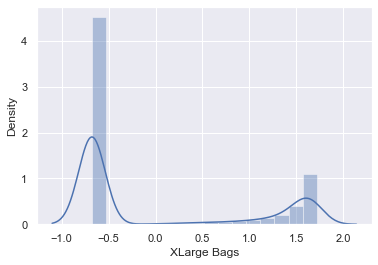

In [67]:
sns.distplot(a1['XLarge Bags'])

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

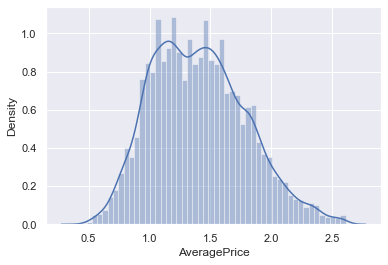

In [68]:
sns.distplot(a1['AveragePrice'])

less skewness is present

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

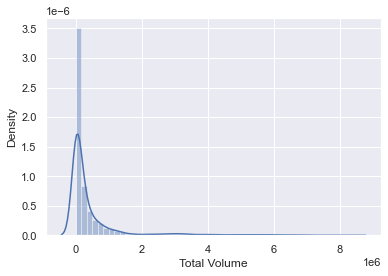

In [69]:
sns.distplot(a1['Total Volume'])

right skewed

In [70]:
#skewness removing
x1=np.array(a1['Total Volume'])
a1['Total Volume']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-70-ee9365f29cc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['Total Volume']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

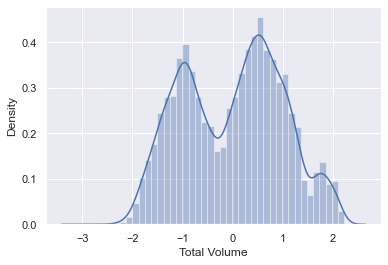

In [71]:
sns.distplot(a1['Total Volume'])

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4046', ylabel='Density'>

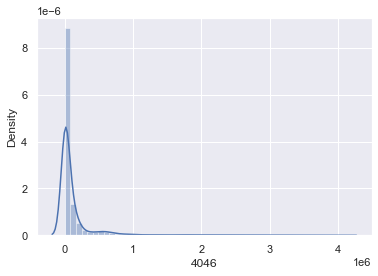

In [72]:
sns.distplot(a1['4046'])

right skewed

In [73]:
#removing the skewness
x1=np.array(a1['4046'])
a1['4046']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-73-962f81031741>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['4046']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4046', ylabel='Density'>

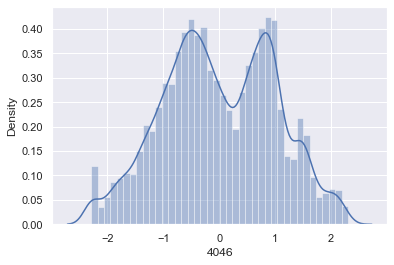

In [74]:
sns.distplot(a1['4046'])

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4225', ylabel='Density'>

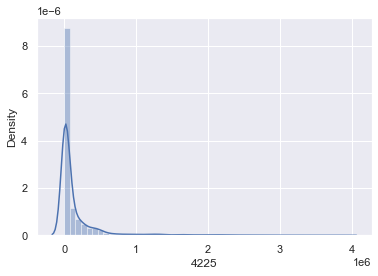

In [75]:
sns.distplot(a1['4225'])

rightskewed

In [76]:
#removing the skewness
x1=np.array(a1['4225'])
a1['4225']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-76-c1daacf3993d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['4225']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4225', ylabel='Density'>

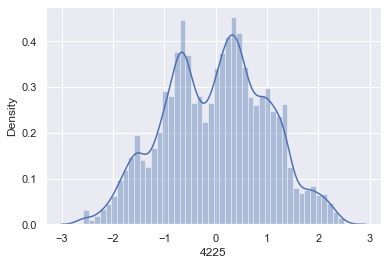

In [77]:
sns.distplot(a1['4225'])

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4770', ylabel='Density'>

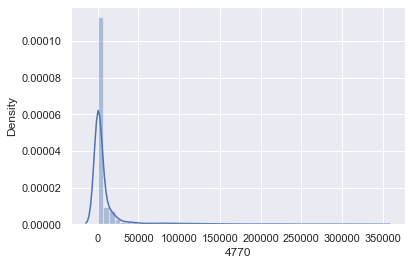

In [78]:
sns.distplot(a1['4770'])

In [79]:
#removing skewness
x1=np.array(a1['4770'])
a1['4770']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-79-6e52365ee03f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['4770']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='4770', ylabel='Density'>

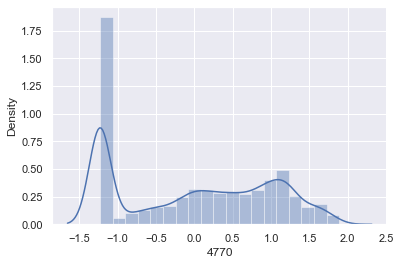

In [80]:
sns.distplot(a1['4770'])

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

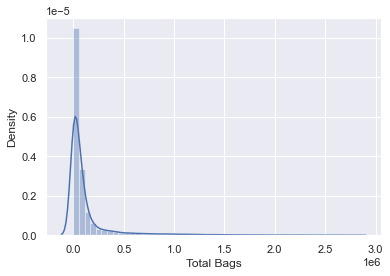

In [81]:
sns.distplot(a1['Total Bags'])

rightskewed

In [82]:
x1=np.array(a1['Total Bags'])
a1['Total Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-82-28799402a3b4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['Total Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total Bags', ylabel='Density'>

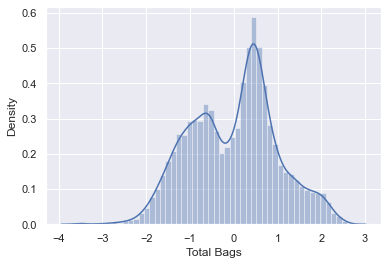

In [83]:
sns.distplot(a1['Total Bags'])

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

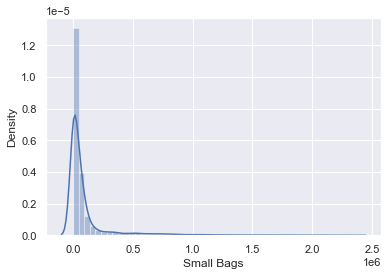

In [84]:
sns.distplot(a1['Small Bags'])

rightskewed

In [85]:
#reducing the skewness
x1=np.array(a1['Small Bags'])
a1['Small Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-85-e8316d4cb4f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['Small Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Small Bags', ylabel='Density'>

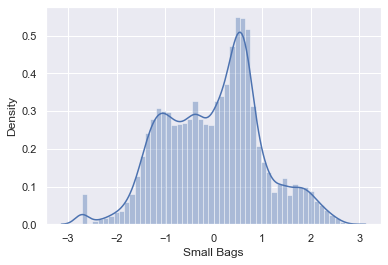

In [86]:
sns.distplot(a1['Small Bags'])

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

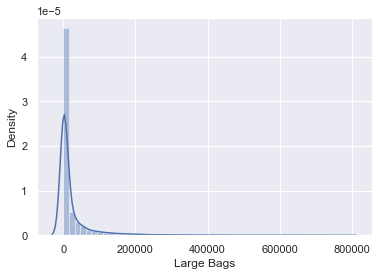

In [87]:
sns.distplot(a1['Large Bags'])

rightskewed

In [88]:
#reducing the skewness
x1=np.array(a1['Large Bags'])
a1['Large Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-88-7d20d139983a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['Large Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Large Bags', ylabel='Density'>

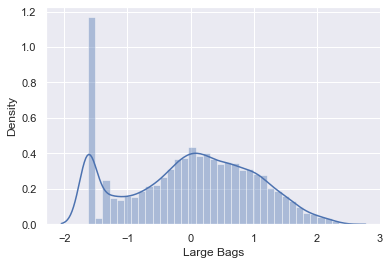

In [89]:
sns.distplot(a1['Large Bags'])

C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

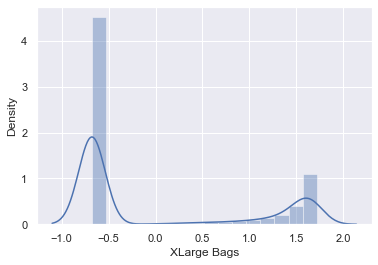

In [90]:
sns.distplot(a1['XLarge Bags'])

skewness is on both sides

In [91]:
#reducing the skewness
x1=np.array(a1['XLarge Bags'])
a1['XLarge Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')

<ipython-input-91-7f4610e20ef5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1['XLarge Bags']=power_transform(x1.reshape(-1,1),method='yeo-johnson')


C:\Users\smahi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

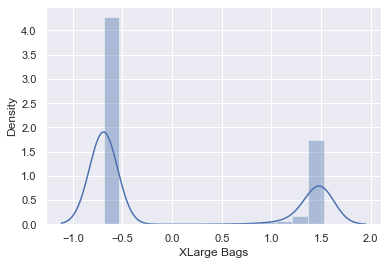

In [92]:
sns.distplot(a1['XLarge Bags'])

##### After skewness is removed the next step is check the correlation between the variable

<AxesSubplot:>

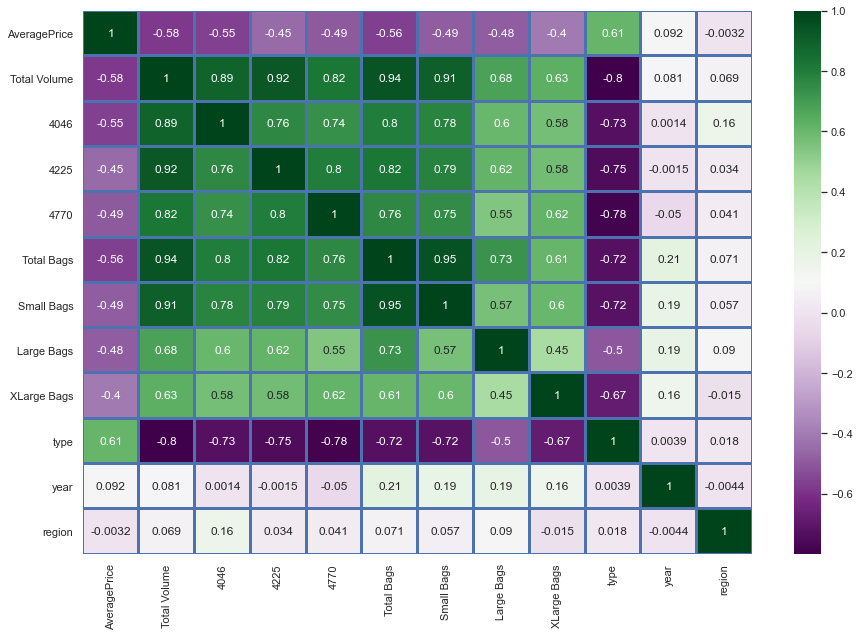

In [93]:
plt.figure(figsize=(15,10))
sns.heatmap(a1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].corr(),annot=True, cmap='PRGn', linewidths=2,linecolor='b')

### variance_inflation_factor

In [94]:
# we have to check the correlation between the variables so that the most influencing can be removed from the data

In [95]:
a1.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.690468,0,0,0
1,50,1.35,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.690468,0,0,0


In [96]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

    column_names  VIF Values
0   Total Volume   51.407435
1     Total Bags   35.842851
2     Small Bags   16.818080
3           4225   11.527128
4   AveragePrice   10.279683
5           type    8.571838
6           4046    7.207949
7         region    3.912526
8           4770    3.879097
9     Large Bags    3.473233
10          year    3.468955
11   XLarge Bags    2.052365


array([<AxesSubplot:title={'center':'VIF Values'}, xlabel='column_names'>],
      dtype=object)

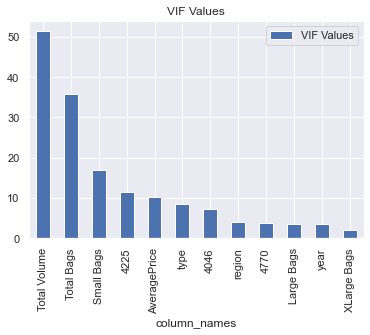

In [97]:
vf=pd.DataFrame()
vf['column_names']=a1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].columns
vf['VIF Values']=[variance_inflation_factor(a1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values,n) for n in range(a1.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].shape[1])]
vf.sort_values(by='VIF Values', ascending=False, inplace=True, ignore_index=True)
print(vf)
vf.plot.bar(x='column_names', y='VIF Values',stacked=True, subplots=True, rot=90)


#### As the Total Volume,Total Bags shows high correlation with other future variabes we are going to drop it

In [98]:
a2=a1.drop(['Total Bags','Total Volume'],axis=1)

In [99]:
a2

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.690468,0,0,0
1,50,1.35,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.690468,0,0,0
2,49,0.93,-0.731776,0.649333,0.023923,-0.374453,-0.758523,-0.690468,0,0,0
3,48,1.08,-0.632592,0.468799,-0.121164,-0.510991,-0.699123,-0.690468,0,0,0
4,47,1.28,-0.684504,0.262126,-0.110491,-0.490534,-0.607027,-0.690468,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,-0.462066,-0.926028,-1.228986,-0.175753,-0.412401,-0.690468,1,3,53
18245,160,1.71,-0.618019,-0.670600,-1.228986,-0.331971,-0.484991,-0.690468,1,3,53
18246,159,1.87,-0.617966,-0.778893,0.445710,-0.313756,-0.950743,-0.690468,1,3,53
18247,158,1.93,-0.547011,-0.716371,0.445399,-0.250408,-0.916068,-0.690468,1,3,53


### Scaling

The last step before feed the date to my machine is scaling i.e reduce the magnitude of all the fileld data
we use minmax scalar or standaziation to scale the data

In [100]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#minamx scaler reduce the value of data in between 0 and 1

In [101]:
a2.head(2)

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.690468,0,0,0
1,50,1.35,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.690468,0,0,0


In [102]:
scale=MinMaxScaler()
scale.fit(a2.iloc[:,[2,3,4,5,6,7]])

MinMaxScaler()

In [103]:
scale.transform(a2.iloc[:,[2,3,4,5,6,7]])

array([[0.35498056, 0.57757163, 0.32276192, 0.43662031, 0.21207306,
        0.        ],
       [0.32886287, 0.5614532 , 0.3379449 , 0.44327957, 0.21457638,
        0.        ],
       [0.33876453, 0.63618871, 0.40181167, 0.43163359, 0.21776385,
        0.        ],
       ...,
       [0.36358503, 0.35516323, 0.53708023, 0.44283071, 0.16942592,
        0.        ],
       [0.37905957, 0.36746539, 0.53698048, 0.45451669, 0.17814568,
        0.        ],
       [0.41991611, 0.35265312, 0.44473608, 0.46164716, 0.14493936,
        0.        ]])

In [104]:
a2

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.690468,0,0,0
1,50,1.35,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.690468,0,0,0
2,49,0.93,-0.731776,0.649333,0.023923,-0.374453,-0.758523,-0.690468,0,0,0
3,48,1.08,-0.632592,0.468799,-0.121164,-0.510991,-0.699123,-0.690468,0,0,0
4,47,1.28,-0.684504,0.262126,-0.110491,-0.490534,-0.607027,-0.690468,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,161,1.63,-0.462066,-0.926028,-1.228986,-0.175753,-0.412401,-0.690468,1,3,53
18245,160,1.71,-0.618019,-0.670600,-1.228986,-0.331971,-0.484991,-0.690468,1,3,53
18246,159,1.87,-0.617966,-0.778893,0.445710,-0.313756,-0.950743,-0.690468,1,3,53
18247,158,1.93,-0.547011,-0.716371,0.445399,-0.250408,-0.916068,-0.690468,1,3,53


### Case=1 average price as target 

In [105]:
a2.head(2)

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.690468,0,0,0
1,50,1.35,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.690468,0,0,0


In [106]:
x1=a2.iloc[:,[0,2,3,4,5,6,7,8,9,10]]
y1=a2.iloc[:,[1]]
y1.shape, x1.shape

((17651, 1), (17651, 10))

### Model Selection

Since the output is continuous data type we are going to use regression type model for this case

In [107]:
#importing the required libraries for regression
import sklearn
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

### Hyper Parameter Tuning

Hyper parameter tuning is nothing but the finding the correct parameters of a model so the model can perform at it highest performance state

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
en, ab,dt,lr=ElasticNet(), AdaBoostRegressor(), DecisionTreeRegressor(), LinearRegression()
#creating perameters
model_par={
           'DecisionTreeRegressor':{'model':dt,'param':{'criterion' : ["mse", "friedman_mse", "mae", "poisson"],'splitter':['best','random']}},
    'AdaBoostRegressor':{'model':ab,'param':{'loss':['linear', 'square', 'exponential'],'n_estimators':[50,75,100,125]}},
    'LinearRegression':{'model':lr,'param':{'fit_intercept':[True],'normalize':[True]}},
    'ElasticNet':{'model':en,'param':{'alpha':[0.5,0.25,0.0001],'l1_ratio':[0.1,0.25,0.5,0.75,0.9]}}
           }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x1,y1)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': 'DecisionTreeRegressor',
  'best_score': -0.05297914169340652,
  'best_params': {'criterion': 'friedman_mse', 'splitter': 'best'}},
 {'model': 'AdaBoostRegressor',
  'best_score': 0.22122285838312078,
  'best_params': {'loss': 'square', 'n_estimators': 75}},
 {'model': 'LinearRegression',
  'best_score': 0.07398942143544618,
  'best_params': {'fit_intercept': True, 'normalize': True}},
 {'model': 'ElasticNet',
  'best_score': 0.07422007257503913,
  'best_params': {'alpha': 0.0001, 'l1_ratio': 0.9}}]

### Observation:
    1.from the above Hyper Parameter Tuning we can see that the model AdaBoostRegressor was giving the best result
    2.we use the AdaBoostRegressor for the model training with parameters loss exponential

In [110]:
ab=AdaBoostRegressor(loss='square',n_estimators=100)

### Model Training

In [112]:
I=[]
score=[]
ma=[]
ms=[]
r2=[]
cv=[]

for i in range(50,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.3,random_state=i)
        ab.fit(xtrain,ytrain)
        tr=ab.score(xtrain,ytrain)
        te=ab.score(xtest,ytest)
        pre=ab.predict(xtest)
        mar=mean_absolute_error(ytest,pre)
        mse=np.sqrt(mean_squared_error(ytest,pre))
        CV=cross_val_score(ab,x1,y1,cv=4).mean()*100
        r=r2_score(ytest,pre)
        I.append(i)
        score.append(te)
        ma.append(mar)
        ms.append(mse)
        r2.append(r)
        cv.append(CV)
values=pd.DataFrame({'accuracy':score,'r2_score':r2,'r_state':I,'error':ms,'CV_score':cv})
values.sort_values(by='accuracy', ascending=False, inplace=True,ignore_index=True)
print('at random state',round(values.loc[0][2],0),'the model having the highest accuracy of',round(values.loc[0][0]*100,2))
print('Mean Square Error Value',values.loc[0][3],'CV_Score',values.loc[0][4])

at random state 96.0 the model having the highest accuracy of 62.83
Mean Square Error Value 0.23827402079596144 CV_Score 6.101931297900534


In [124]:
#model saving
import pickle
filename='avocado1.pkl'
pickle.dump(ab,open(filename,'wb'))

### Case=2 Region as Target

In [125]:
a2.head(2)

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,51,1.33,-0.657421,0.351430,-0.222566,-0.347421,-0.781153,-0.690468,0,0,0
1,50,1.35,-0.777179,0.269513,-0.175223,-0.311322,-0.771198,-0.690468,0,0,0


In [126]:
x2=a2.iloc[:,0:-1]
y2=a2.iloc[:,-1]

### Balencing the data set

In [127]:
from imblearn.over_sampling import SMOTE
x2, y2 = SMOTE().fit_resample(x2, y2)

In [129]:
x2.shape,y2.shape

((18252, 10), (18252,))

In [133]:
# now we can feed the data to moodels
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [135]:
knc, rfc,abc,dtc=KNeighborsClassifier(), RandomForestClassifier(), AdaBoostClassifier(), DecisionTreeClassifier()
#creating perameters
model_par={
           knc:{'model':knc,'param':{'n_neighbors' : [5,6,7],'leaf_size':[30,40,50]}},
    rfc:{'model':rfc,'param':{'n_estimators':[100,150,200],'min_samples_split':[2,3,4]}},
    abc:{'model':abc,'param':{'n_estimators':[50,100,150],'learning_rate':[1,1.2,1.5]}},
    dtc:{'model':dtc,'param':{'min_samples_split':[2,3,4],'min_samples_leaf':[1,2,3]}}
           }
scores=[]
for model_name, mp in model_par.items():
    model_selection=GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x2,y2)
    scores.append({'model':model_name,'best_score':model_selection.best_score_,'best_params':model_selection.best_params_})
scores

[{'model': KNeighborsClassifier(),
  'best_score': 0.06355598578734292,
  'best_params': {'leaf_size': 30, 'n_neighbors': 5}},
 {'model': RandomForestClassifier(),
  'best_score': 0.737173542245885,
  'best_params': {'min_samples_split': 2, 'n_estimators': 200}},
 {'model': AdaBoostClassifier(),
  'best_score': 0.1167000371450119,
  'best_params': {'learning_rate': 1.5, 'n_estimators': 150}},
 {'model': DecisionTreeClassifier(),
  'best_score': 0.5859608814248677,
  'best_params': {'min_samples_leaf': 1, 'min_samples_split': 2}}]

### Observations:
    1. of all the  4 models RandomForestClassifier performs best
    2. we choosing this model for the train purpose

In [137]:
rfc=RandomForestClassifier(min_samples_split=2,n_estimators=200)

In [143]:
I=[]
score=[]
ma=[]
ms=[]
r2=[]
cv=[]

for i in range(1,100):
        xtrain,xtest,ytrain,ytest=train_test_split(x2,y2,test_size=0.3,random_state=i)
        rfc.fit(xtrain,ytrain)
        tr=rfc.score(xtrain,ytrain)
        te=rfc.score(xtest,ytest)
        pre=rfc.predict(xtest)
        mar=mean_absolute_error(ytest,pre)
        mse=np.sqrt(mean_squared_error(ytest,pre))
        CV=cross_val_score(rfc,x2,y2,cv=4).mean()*100
        r=r2_score(ytest,pre)
        I.append(i)
        score.append(te)
        ma.append(mar)
        ms.append(mse)
        r2.append(r)
        cv.append(CV)
values=pd.DataFrame({'accuracy':score,'r2_score':r2,'r_state':I,'error':ms,'CV_score':cv})
values.sort_values(by='accuracy', ascending=False, inplace=True,ignore_index=True)
print('at random state',round(values.loc[0][2],0),'the model having the highest accuracy of',round(values.loc[0][0]*100,2))
print('Mean Square Error Value',values.loc[0][3],'CV_Score',values.loc[0][4])

at random state 18.0 the model having the highest accuracy of 93.24
Mean Square Error Value 5.909547684460799 CV_Score 68.49660311198772


In [144]:
#model saving
import pickle
filename='avocado2.pkl'
pickle.dump(rfc,open(filename,'wb'))